![title](notebooks/assets/problem.png)

**In other words, we will attempt to model the contract-bidding strategy.** If you are not familiar with ♠️ Belote Maniée ♠️, make sure to:

- Check out the game: <a href="https://belotemaniee.com">Online Belote Maniée</a>
- Get a basic understanding of the rules: <a href="https://youtu.be/hyM0vTLi7LU">Basic Tutorial</a> | <a href="https://youtu.be/koQ1spWhxF8">Advanced Tutorial</a>

Belote is one of the most exciting games in the contract & trick-taking family (arguably right after Bridge) - **you won't be disappointed !**

In [3]:
BASE_PATH = "/Users/seanariel/Desktop/la-maniee/data/mlops"

### Load the data

In [4]:
synthetic_game_data = pd.read_csv(PATH_TO_SYNTHETIC_DATA)

### Get a first feeling of the features

In [5]:
synthetic_game_data.head(1)

,contract,reward,starter,turn,hr_deal_p1,hr_deal_p2,last_bidder,visible_deal,total_points,features
0,spades,-162,2,2,9♣️A❤️8❤️7♣️J♦️K♦️10❤️Q♦️J♠️Q❤️8♣️8♠️Q♣️9❤️A♠️7♠️,7❤️K♣️9♦️10♦️Q♠️7♦️A♣️10♠️8♦️A♦️9♠️K♠️K❤️J♣️J❤️10♣️,1,9♣️A❤️8❤️7♣️J♦️K♦️10❤️Q♦️J♠️Q❤️8♣️8♠️,53,"{'feature_belote_rebelote_points': array([0, 0, 0, 0]), 'feature_count_of_cards': array([2, 1, 2, 2, 0, 1, 2, 2]), 'feature_count_of_suit': array([2, 5, 1, 4]), 'feature_opponent_belote_rebelote_points': array([0, 0, 0, 0]), 'feature_opponent_tierce_plus_points': array([0, 0, 0, 0]), 'feature_suit_aggressivity': array([1, 2, 0, 0, 0, 0, 0, 0]), 'feature_tierce_plus_points': array([0, 0, 0, 0])}"


In [6]:
synthetic_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   contract      500000 non-null  object
 1   reward        500000 non-null  int64 
 2   starter       500000 non-null  int64 
 3   turn          500000 non-null  int64 
 4   hr_deal_p1    500000 non-null  object
 5   hr_deal_p2    500000 non-null  object
 6   last_bidder   500000 non-null  int64 
 7   visible_deal  500000 non-null  object
 8   total_points  500000 non-null  int64 
 9   features      500000 non-null  object
dtypes: int64(5), object(5)
memory usage: 38.1+ MB


**Each row in this dataset is a whole game played by the reinforcement learning agent, against himself.** The reward generated is always reflective of player 1's perspective - i.e. the real version of the agent (while you can think of player 2 as a clone of himself).

Here's a quick overview of the different columns:
- **Contract** refers to the game system the 2 players have settled on before starting the main game
- **Reward** refers to the total number of points won (or lost, when negative) in the main game
- **Starter** refers to the player who started the bidding, ad the maingame
- **Turn** is irrelevant here
- **Hr_deal_p1** refers to the whole deal held by P1
- **Hr_deal_p2** refers to the whole deal held by p2
- **Last_bidder** refers to the player who makes the final bid of the contract
- **Visible_deal** refers to the cards p1 can actually see during the contract phase
- **Total_points** refers to the face value of the visible cards held by p1 in the contract phase

Regarding the generation of the last column named "Features":

- You can read more about this process here - <a href="https://seanariel.com/2022/09/28/training-a-model-to-beat-me-at-my-own-game/">Training an RL Agent to beat me at my own game</a>
- You can get a detailed understanding of the features here - <a href="https://docs.google.com/document/d/1sg_NpBOSLfza1gv3qJTBxiTfs3EQD2UGoRZW9MqsvYU/edit?usp=sharing">Detailed Feature Composition</a>

![title](notebooks/assets/features.png)

### Ensure the balance/stability in target & covariates

In [7]:
synthetic_game_data.describe()

,reward,starter,turn,last_bidder,total_points
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,-9.390620,1.461896,1.461896,1.461466,63.578962
std,147.830557,0.498546,0.498546,0.498513,22.609908
min,-438.000000,1.000000,1.000000,1.000000,4.000000
25%,-154.000000,1.000000,1.000000,1.000000,47.000000
50%,-2.000000,1.000000,1.000000,1.000000,60.000000
75%,114.000000,2.000000,2.000000,2.000000,76.000000
max,438.000000,2.000000,2.000000,2.000000,167.000000


''

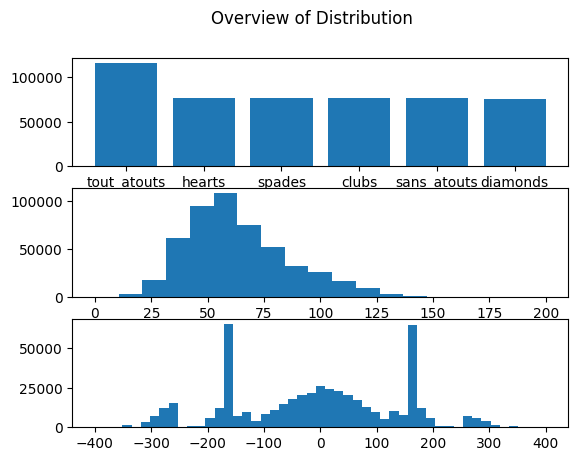

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle("Overview of Distribution")

distribution = synthetic_game_data["contract"].value_counts()

ax1.bar(distribution.index, distribution.values)
ax2.hist(synthetic_game_data["total_points"], bins=np.linspace(-0, 200, 20))
ax3.hist(synthetic_game_data["reward"], bins=np.linspace(-400, 400, 50))
;

### Review the processed features 

In [81]:
feature_store.head()

,contract,reward,last_bidder,starter,total_points,has_x_cards_in_suit_clubs,has_x_cards_in_suit_diamonds,has_x_cards_in_suit_hearts,has_x_cards_in_suit_spades,has_x_sevens,has_x_eights,has_x_nines,has_x_tens,has_x_jacks,has_x_queens,has_x_kings,has_x_aces,has_BR_at_clubs,has_BR_at_diamonds,has_BR_at_hearts,has_BR_at_spades,has_tierce_at_clubs,has_tierce_at_diamonds,has_tierce_at_hearts,has_tierce_at_spades,total_BR_points,total_tierce_points,total_AnD_points,clubs,diamonds,hearts,sans_atouts,spades,tout_atouts,p1_has_won
0,spades,48,1,2,46,1,4,2,5,2,2,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,sans_atouts,-34,2,1,43,6,2,2,2,1,1,2,2,1,1,2,2,0,0,0,0,20,0,0,0,0,20,20,0,0,0,1,0,0,0
2,spades,-182,1,1,36,4,3,3,2,1,1,3,1,2,1,2,1,0,0,0,20,0,0,0,0,20,0,20,0,0,0,0,1,0,0
3,spades,88,1,1,84,5,2,4,1,3,2,0,1,2,1,1,2,0,0,20,0,0,0,0,0,20,0,20,0,0,0,0,1,0,1
4,tout_atouts,30,1,1,80,3,4,2,3,0,2,2,3,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


We will aim to model the variable `p1_has_won`. That is, a value of 1 when `reward > 0` or 0 otherwise. When you bid on a contract at Belote Maniée - winning it is all you should think about. **Loosing a contract you bid on is the worst outcome that can occur (regardless of the actual number of points achieve),** as you loose the sum of all the points. If you decide to outbid your opponent, you should make sure you're going to win the maingame!

Let's take this party to <a href="https://docs.google.com/spreadsheets/d/1FX6pKsNQoQRRQGbjmy9XWrlTF3rudSfoMruaJvkm-uQ/edit?usp=sharing">Google Big Query</a> for the Analytics heavy lifting!

### Generate the precision and recall metrics

As the source of signals coming from the covariates is quite promising, we move one to **train a Machine Learning model on this feature store through supervised learned.** This will allow us to know the contract most likely to result in a victory given any starting hand.

The first results are very interesting - with a sensible ranking of feature importances and a fine looking precision recall curve!

In [138]:
metrics_df.head()

,precision,recall,threshold
0,0.494328,1.000000,0.27
384,0.496202,0.999768,0.28
2600,0.507155,0.998100,0.29
6212,0.524948,0.993075,0.30
8512,0.536269,0.988452,0.31


ROC_AUC 0.7816897618062584
Accuracy 0.6939742439105842


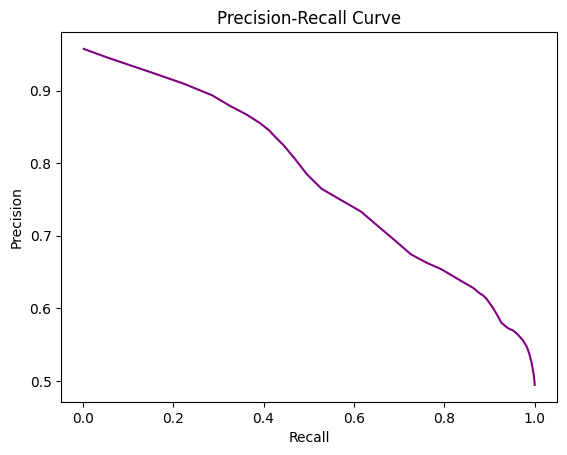

In [139]:
print("ROC_AUC", roc_auc_score(target_testing, predictions))
print("Accuracy", accuracy_score(target_testing, covariates_testing.predicted))
fig, ax = plt.subplots()
ax.plot(metrics_df["recall"].values, metrics_df["precision"].values, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

### Interpret the model

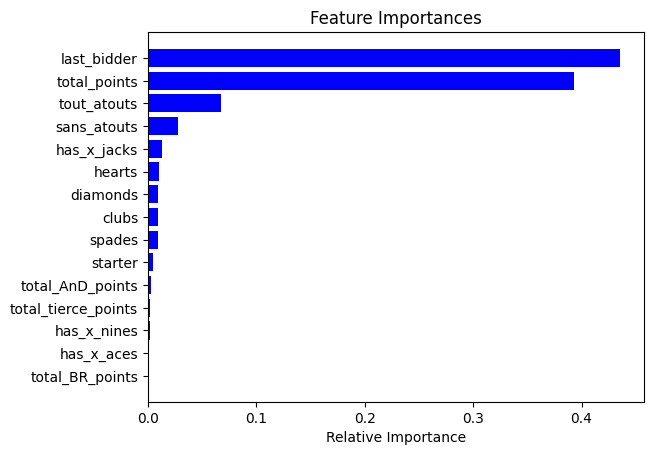

In [140]:
importances = optimal_model.feature_importances_
indices = np.argsort(importances)[-15:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [COVARIATES[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Putting it all together

I retrained this model on **100M game simulations,** and deployed it to production as a containerized micro-service. This is what <a href="https://belotemaniee.com">Belote Maniée</a> now looks like behind the scenes.

![title](notebooks/assets/archi.png)

As it turns out - most of the questions I received regarding this projects concerned this last part, i.e. **the productization and deployment of Machine Learning models @ Scale.**

Since all these questions came from **people working in Business Analytics and Data Science,** I decided to create a practical, hands-on Machine Learning Engineering & Operations training tailored for them!

![title](notebooks/assets/training.png)

**If that sounds interesting to you - feel free to reach out for more information** => <a href="https://forms.gle/pSWs6KeERfFpxdju9"> Contact Sean Ariel </a>


This material has been development for learning purposes and can't be distributed without the explicit consent of it's creator.
© Sean Ariel